# CS4035 - Cyber Data Analytics
## Lab 2 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 2 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

Dataset here : https://www.batadal.net/data.html You will need Training Dataset 1, Training Dataset 1 and Test Dataset.

## Group Number : 37

## Student 1 
### Name :
### ID :

## Student 2
### Name : Menno Bezema
### ID : 4248252

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

We added a requirements.txt file, install all the requirements using pip install -r requirements.txt

TODO: create the file with all dependencies:
- statsmodels
- pandas
- numpy
- matplotlib
- seaborn
- tslearn

### index (Easy navigation to sections)
0. [Pre-processing](#0)
1. [Familiarization task](#1)
    - [Answer the Three Question (and Visualization)](#1a)
2. [LOF task](#2)
    - [Plot LOF scores](#2a)
    - [Analysis and answers to the questions](#2b)
3. [PCA task](#3)
    - [Plot PCA residuals](#3a)
    - [Analysis and answers to the questions](#3b)
4. [ARMA task](#4)
    - [Print the relevant plots and/or metrics to determine the parametes](#4a)
    - [Plots to study the detected anomalies](#4b)
    - [Analysis and answers to the questions](#4c)
5. [N-gram task](#5)
    - [Visualize the discretization](#5a)
    - [Analysis and answers to the questions. Also provide relevant plots](#5b)
5. [Comparison task](#6)
    - [Use the given guidelines and provide a comparision of the above implemented methods.](#6a)

In [13]:
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import rcParams
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('Solarize_Light2')
style.use('Solarize_Light2')
%matplotlib inline
print(plt.style.available)
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
rcParams['figure.figsize'] = 6,5

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [2]:
df = pd.DataFrame(pd.read_csv('BATADAL_trainingset1.csv')) # No attacks
df_attacks = pd.DataFrame(pd.read_csv('BATADAL_trainingset2.csv')) # With attacks
df_nolabels = pd.DataFrame(pd.read_csv('BATADAL_test_dataset.csv')) # With attacks no labels
pd.set_option('display.expand_frame_repr', False)


# Add missing attack labels

# The ATT_FLAG labels in dataset 2 in is incomplete, 
# here we add the missing labels to the dataset. 
# See https://batadal.net/images/Attacks_TrainingDataset2.png

df_attacks = df_attacks.set_index("DATETIME")
df_attacks[" ATT_FLAG"]["26/09/16 11":"27/09/16 10"] = 1 # Attack #2
df_attacks[" ATT_FLAG"]["29/10/16 19":"02/11/16 16"] = 1 # Attack #4
df_attacks[" ATT_FLAG"]["26/11/16 17":"29/11/16 04"] = 1 # Attack #5
df_attacks[" ATT_FLAG"]["06/12/16 07":"10/12/16 04"] = 1 # Attack #6
df_attacks[" ATT_FLAG"]["14/12/16 15":"19/12/16 04"] = 1 # Attack #7
df_attacks = df_attacks.reset_index()

C:\tools\Anaconda3\envs\Cyber Data analytics\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\tools\Anaconda3\envs\Cyber Data analytics\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\tools\Anaconda3\envs\Cyber Data analytics\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\tools\Anaconda3\envs\

<a id='1'></a>

## 1. Familiarization task – 1 A4

Load the BATADAL sensor data (start with the training data 1, optimize using training data 2, test with the test data) into Jupyter Notebook and understand the data. Answer the following questions:

1.	What types of signals are there?
2.	Are the signals correlated? Do they show cyclic behavior?
3.	Is predicting the next value in a series easy or hard? Use any method from class.

Visualize these types, the presence or absence of correlation, and the performance of prediction.


<a id='1a'></a>


### 1a and b. Answers to the three questions (and visualization)

#### 1.	What types of signals are there?

We use pandas DataFrame:describe() method to get insight into the data contained inside the dataframe. There are 44 columns in total, 16 of which being integers and the rest floating point values. The integer values are all either 0 or 1, and nothing else.

Thus, we can say there are 2 main types of data, boolean values and numerical, these belong to the actuators and sensors respectively.

The website https://batadal.net states: "the flow data unit is LPS, pressure and water level units are meters." This suggests that the F\_* columns contain flow data, and the L\_T* columns describe water levels.

We have the columns L\_T1, ..., L\_T7. All of them are floating point values between 0 and 5.5, likely they describe the same kind of signal, preumably water levels in different tanks. 

In [34]:
L_T_columns = [col for col in df.columns if 'L_T' in col]
df[L_T_columns].describe()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7
count,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000
mean,2.676905,3.285748,4.201820,3.568129,2.748205,5.370437,3.302672
std,1.202940,1.468621,0.678465,0.539656,0.735162,0.177459,0.828849
min,0.320112,0.293876,2.882847,2.002133,1.293241,4.824605,1.054194
25%,1.650647,2.131776,3.623394,3.139640,2.123508,5.248147,2.631062
50%,2.798855,3.498371,4.240439,3.574840,2.758198,5.500000,3.252838
75%,3.754744,4.570782,4.793697,4.009889,3.372392,5.500000,3.986883
max,4.871329,5.663802,5.433022,4.690665,4.162726,5.500000,4.999618


Then we have the F\_PU1, ..., F\_PU11 and S\_PU1,..., S\_PU11. The F-columns are floating point values and the S-columns booleans. The naming suggests these are linked, and thus likely describe an actuator linked to a sensor in some way. Some F\_PU columns contain all zeroes, its worth noting that if this is the case, the corresponding S-column contains all zeroes as well.

In [63]:
print("The F_PU columns contain floating point values:")
F_PU_columns = [col for col in df.columns if 'F_PU' in col]
df[F_PU_columns].describe()

The F_PU columns contain floating point values:


,F_PU1,F_PU2,F_PU3,F_PU4,F_PU5,F_PU6,F_PU7,F_PU8,F_PU9,F_PU10,F_PU11
count,8761.000000,8761.000000,8761.0,8761.000000,8761.0,8761.000000,8761.000000,8761.000000,8761.0,8761.000000,8761.000000
mean,100.926032,69.464357,0.0,14.555019,0.0,0.067010,41.713934,21.092609,0.0,25.113333,0.010240
std,10.048618,42.239742,0.0,17.042785,0.0,1.566865,17.832829,17.421239,0.0,12.080971,0.480321
min,85.495201,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,94.342598,0.000000,0.0,0.000000,0.0,0.000000,47.856720,0.000000,0.0,29.492449,0.000000
50%,96.729073,94.075195,0.0,0.000000,0.0,0.000000,49.235249,34.566250,0.0,30.518000,0.000000
75%,112.294952,96.614708,0.0,34.030491,0.0,0.000000,50.052559,35.539124,0.0,31.368645,0.000000
max,122.705627,100.140671,0.0,38.296165,0.0,37.808529,51.658520,39.133995,0.0,33.888046,24.025967


In [62]:
print("The S_PU columns contain boolean values:")
S_PU_columns = [col for col in df.columns if 'S_PU' in col]
df[S_PU_columns].describe()


The S_PU columns contain boolean values:


,S_PU1,S_PU2,S_PU3,S_PU4,S_PU5,S_PU6,S_PU7,S_PU8,S_PU9,S_PU10,S_PU11
count,8761.0,8761.000000,8761.0,8761.000000,8761.0,8761.000000,8761.000000,8761.000000,8761.0,8761.000000,8761.000000
mean,1.0,0.730624,0.0,0.422440,0.0,0.001826,0.846022,0.594909,0.0,0.813035,0.000457
std,0.0,0.443661,0.0,0.493976,0.0,0.042698,0.360948,0.490938,0.0,0.389906,0.021364
min,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.0,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,1.000000,0.000000
50%,1.0,1.000000,0.0,0.000000,0.0,0.000000,1.000000,1.000000,0.0,1.000000,0.000000
75%,1.0,1.000000,0.0,1.000000,0.0,0.000000,1.000000,1.000000,0.0,1.000000,0.000000
max,1.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


We have columns F\_V2 and S\_V2 containing similar data as the colums described above, S\_V2 being boolean and F\_V2 float. 

In [50]:
df[['F_V2', 'S_V2']].describe()

,F_V2,S_V2
count,8761.000000,8761.000000
mean,56.465939,0.729141
std,36.019398,0.444429
min,0.000000,0.000000
25%,0.000000,0.000000
50%,70.145271,1.000000
75%,82.978416,1.000000
max,115.467079,1.000000


Then come another 12 float columns named P\_J followed by a (seemingly random) number they seem to contain similar data as the F\_PU columns. Lastly there is ATT\_FLAG, another boolean column indicating the presence of an attack or not.

In [51]:
P_J_columns = [col for col in df.columns if 'P_J' in col]
df[P_J_columns].describe()

,P_J280,P_J269,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
count,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000
mean,2.979773,32.369772,27.766451,79.411082,27.776600,82.737615,24.453808,74.459039,24.362250,67.921632,33.755911,29.453266
std,0.006436,5.556626,2.740755,8.461924,2.720291,7.502937,4.416089,9.974357,4.438203,5.321227,4.232716,2.658146
min,2.973505,20.172508,20.629910,65.059624,20.690191,54.757198,14.797167,58.325397,14.541955,51.697071,27.649677,22.370066
25%,2.975207,26.161434,26.656116,71.978676,26.674088,83.912292,20.516289,62.949253,20.409576,66.718307,30.668709,28.432796
50%,2.976400,34.729843,28.108925,75.879807,28.110842,85.219460,22.969397,81.176102,22.856150,68.807007,32.222023,29.834288
75%,2.989567,36.005779,29.552883,88.221329,29.553995,86.416519,28.457081,82.673698,28.382421,71.218712,38.134647,31.275637
max,2.991268,40.634285,33.763836,94.961258,33.763836,105.951820,36.325947,89.053986,36.325947,96.180450,45.388145,35.161724


#### 2.	Are the signals correlated? Do they show cyclic behavior?

If we make a heatmap we also see that some columns correlate heavily, also between the P\_J and F\_PU columns. For example, there is a strong negative correlation between F\_PU1 and P\_J269 and between F\_PU2 and P\_J280. There is a strong positive correlation between F\_PU4 and P\_J256 (among many others).

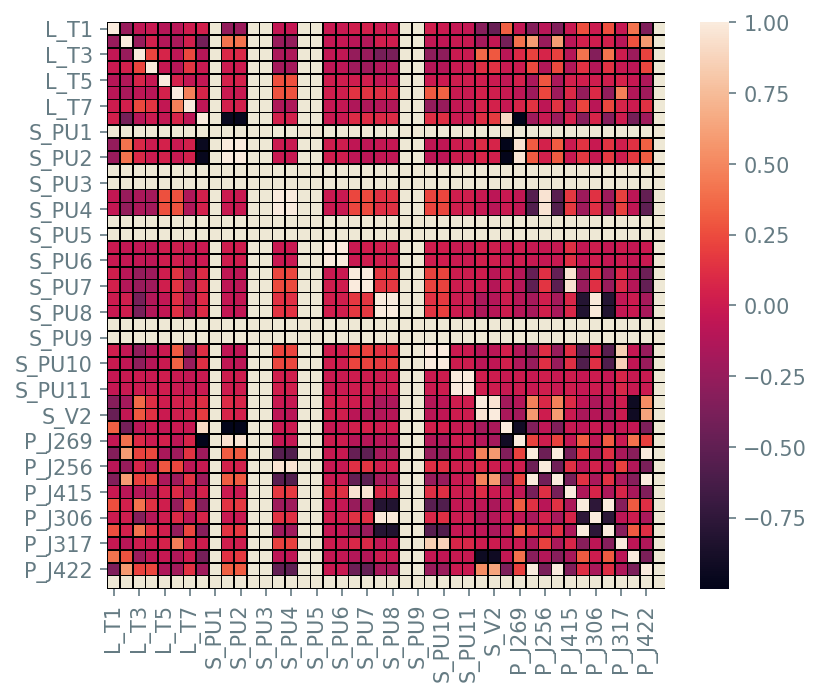

1    8761
Name: S_PU1, dtype: int64
0    8761
Name: F_PU3, dtype: int64
0    8761
Name: S_PU3, dtype: int64
0    8761
Name: F_PU5, dtype: int64
0    8761
Name: S_PU5, dtype: int64
0    8761
Name: F_PU9, dtype: int64
0    8761
Name: S_PU9, dtype: int64
0    8761
Name: ATT_FLAG, dtype: int64


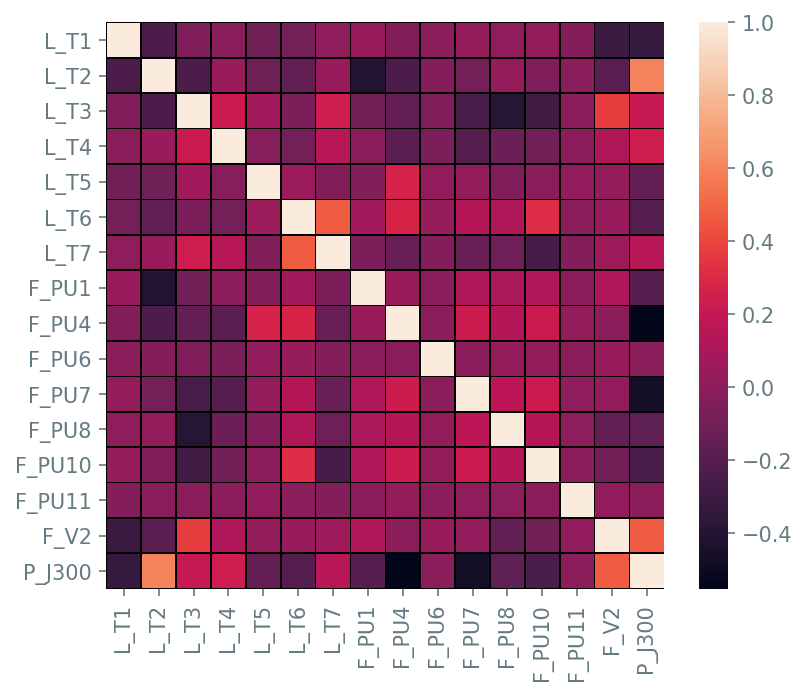

In [56]:
sns.heatmap(df.corr(), linewidths=0.3, linecolor='black')
values = df['F_PU1']
plt.show()

# Remove all columns with a perfect correlation: 
perfect_cor = ['S_PU1', 'F_PU3', 'S_PU3', 'F_PU5', 'S_PU5', 'F_PU9', 'S_PU9', 'ATT_FLAG']
# check all the removed columns on their data (they all contain exactly the same value everywhere so they can be removed)
final_columns = list(df.columns)
for col in perfect_cor:
    print(df[col].value_counts())
    final_columns.remove(col)

def trim_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

new_df = trim_correlated(df[final_columns], 0.8)
sns.heatmap(new_df.corr(), linewidths=0.3, linecolor='black')

If we take a few of the signals and plot them together, we see that many of them are cyclical, at least the F\_PU* signals and L\_T* move in regular intervals. The P\_J* signals seem to be less regular, although they still move up and down with a fairly steady period and amplitude. Additionaly, at least some of them are definitely correlating signals, like F\_PU1 and F\_PU2. 

You can see a clear correlation between F_PU1 and F_PU2


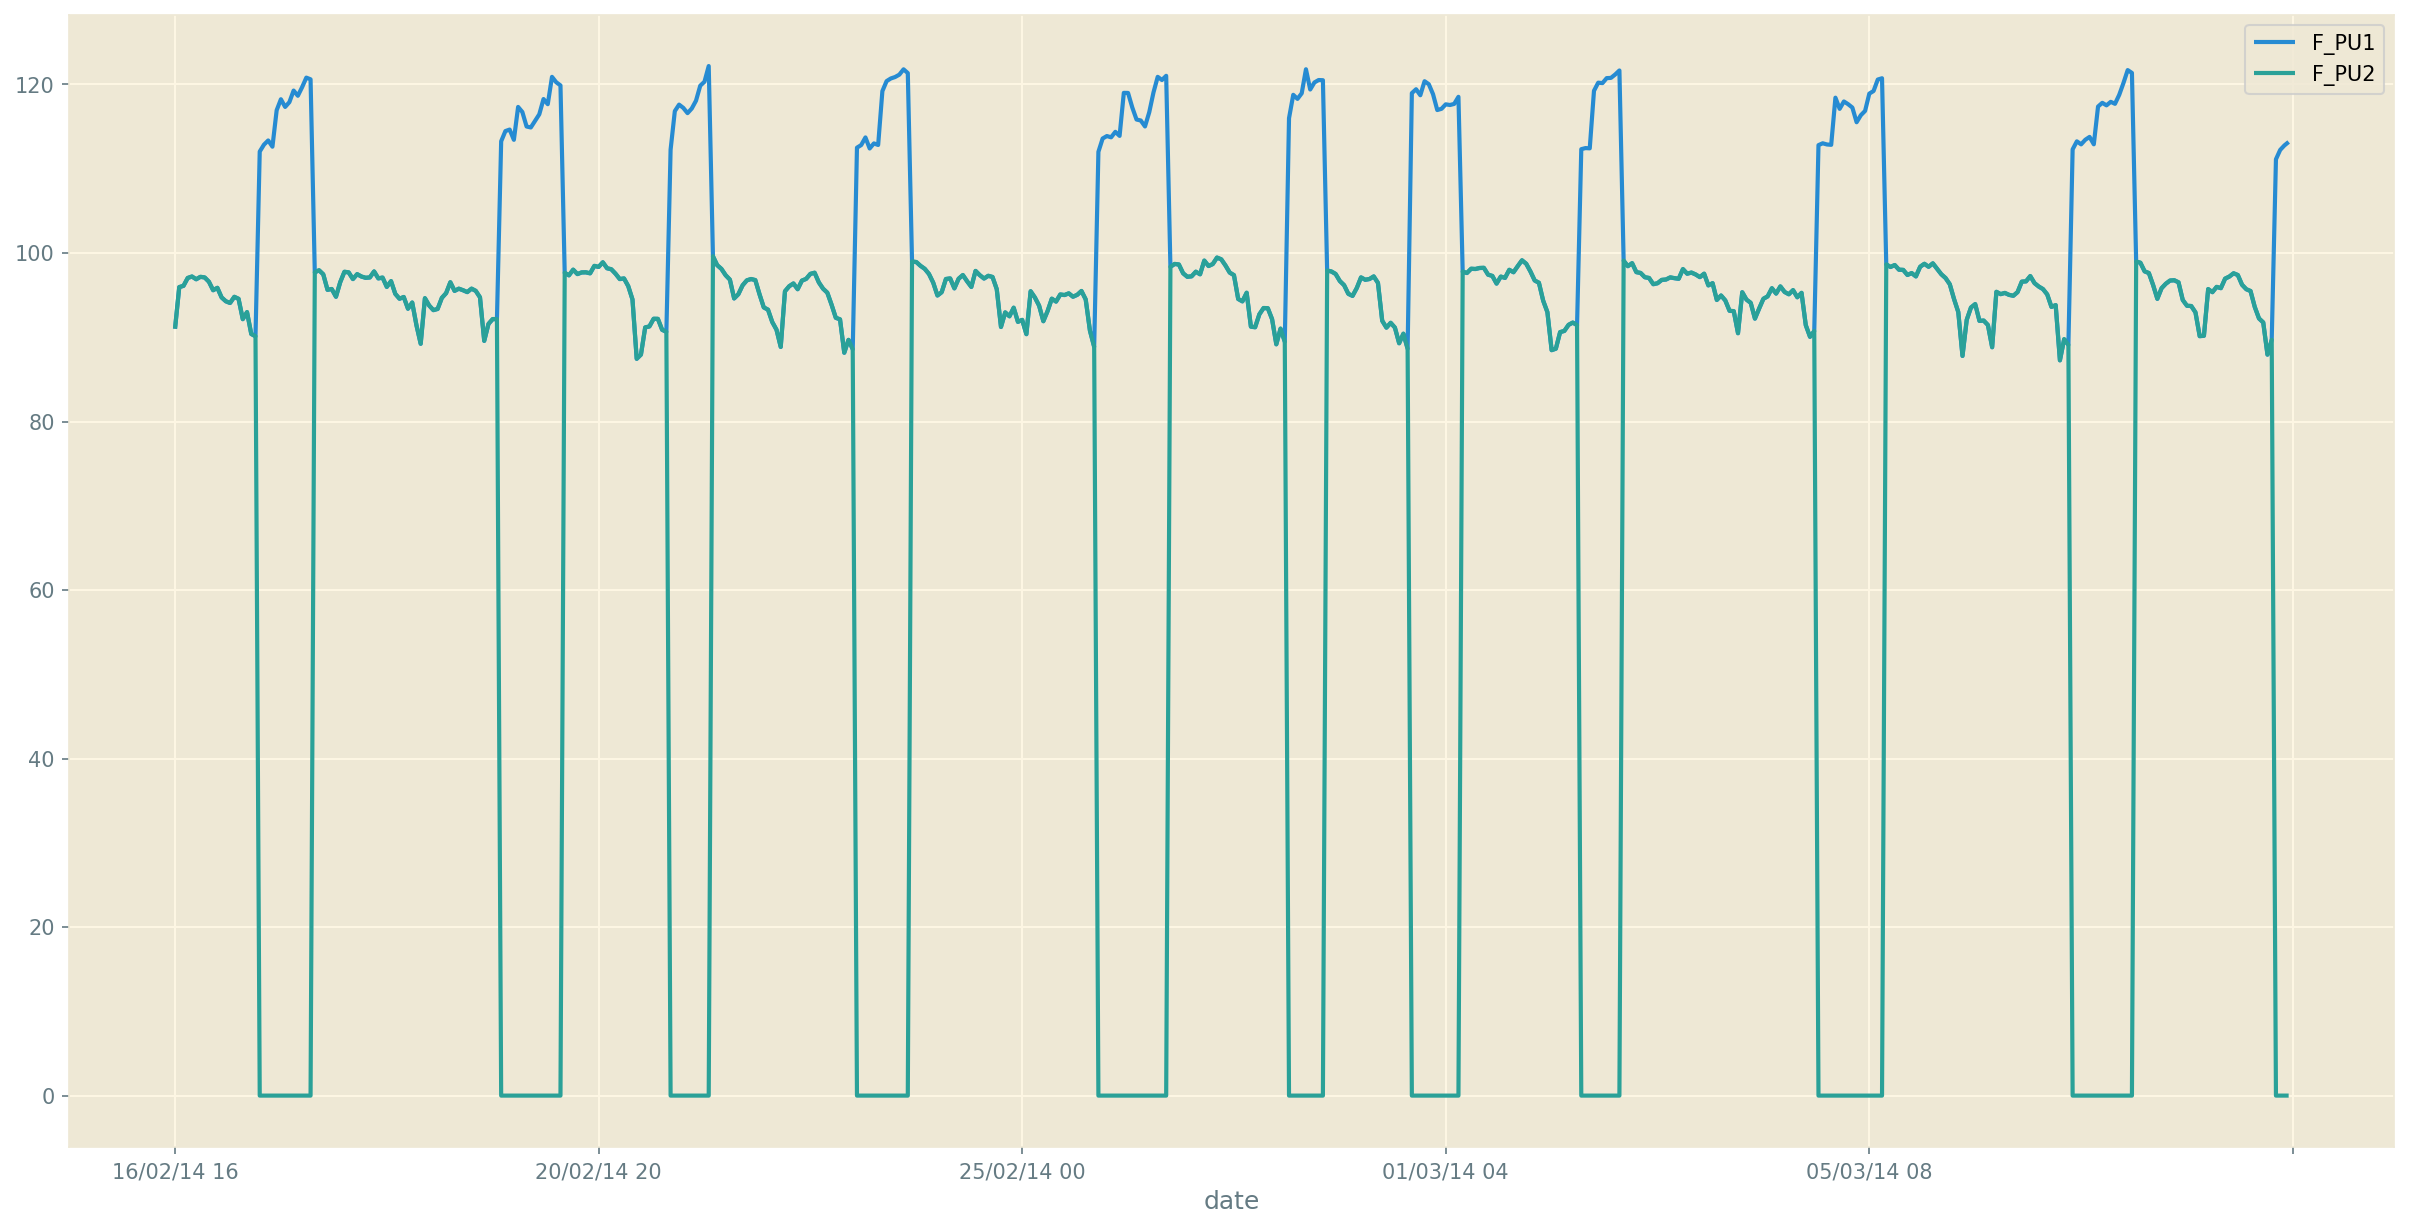

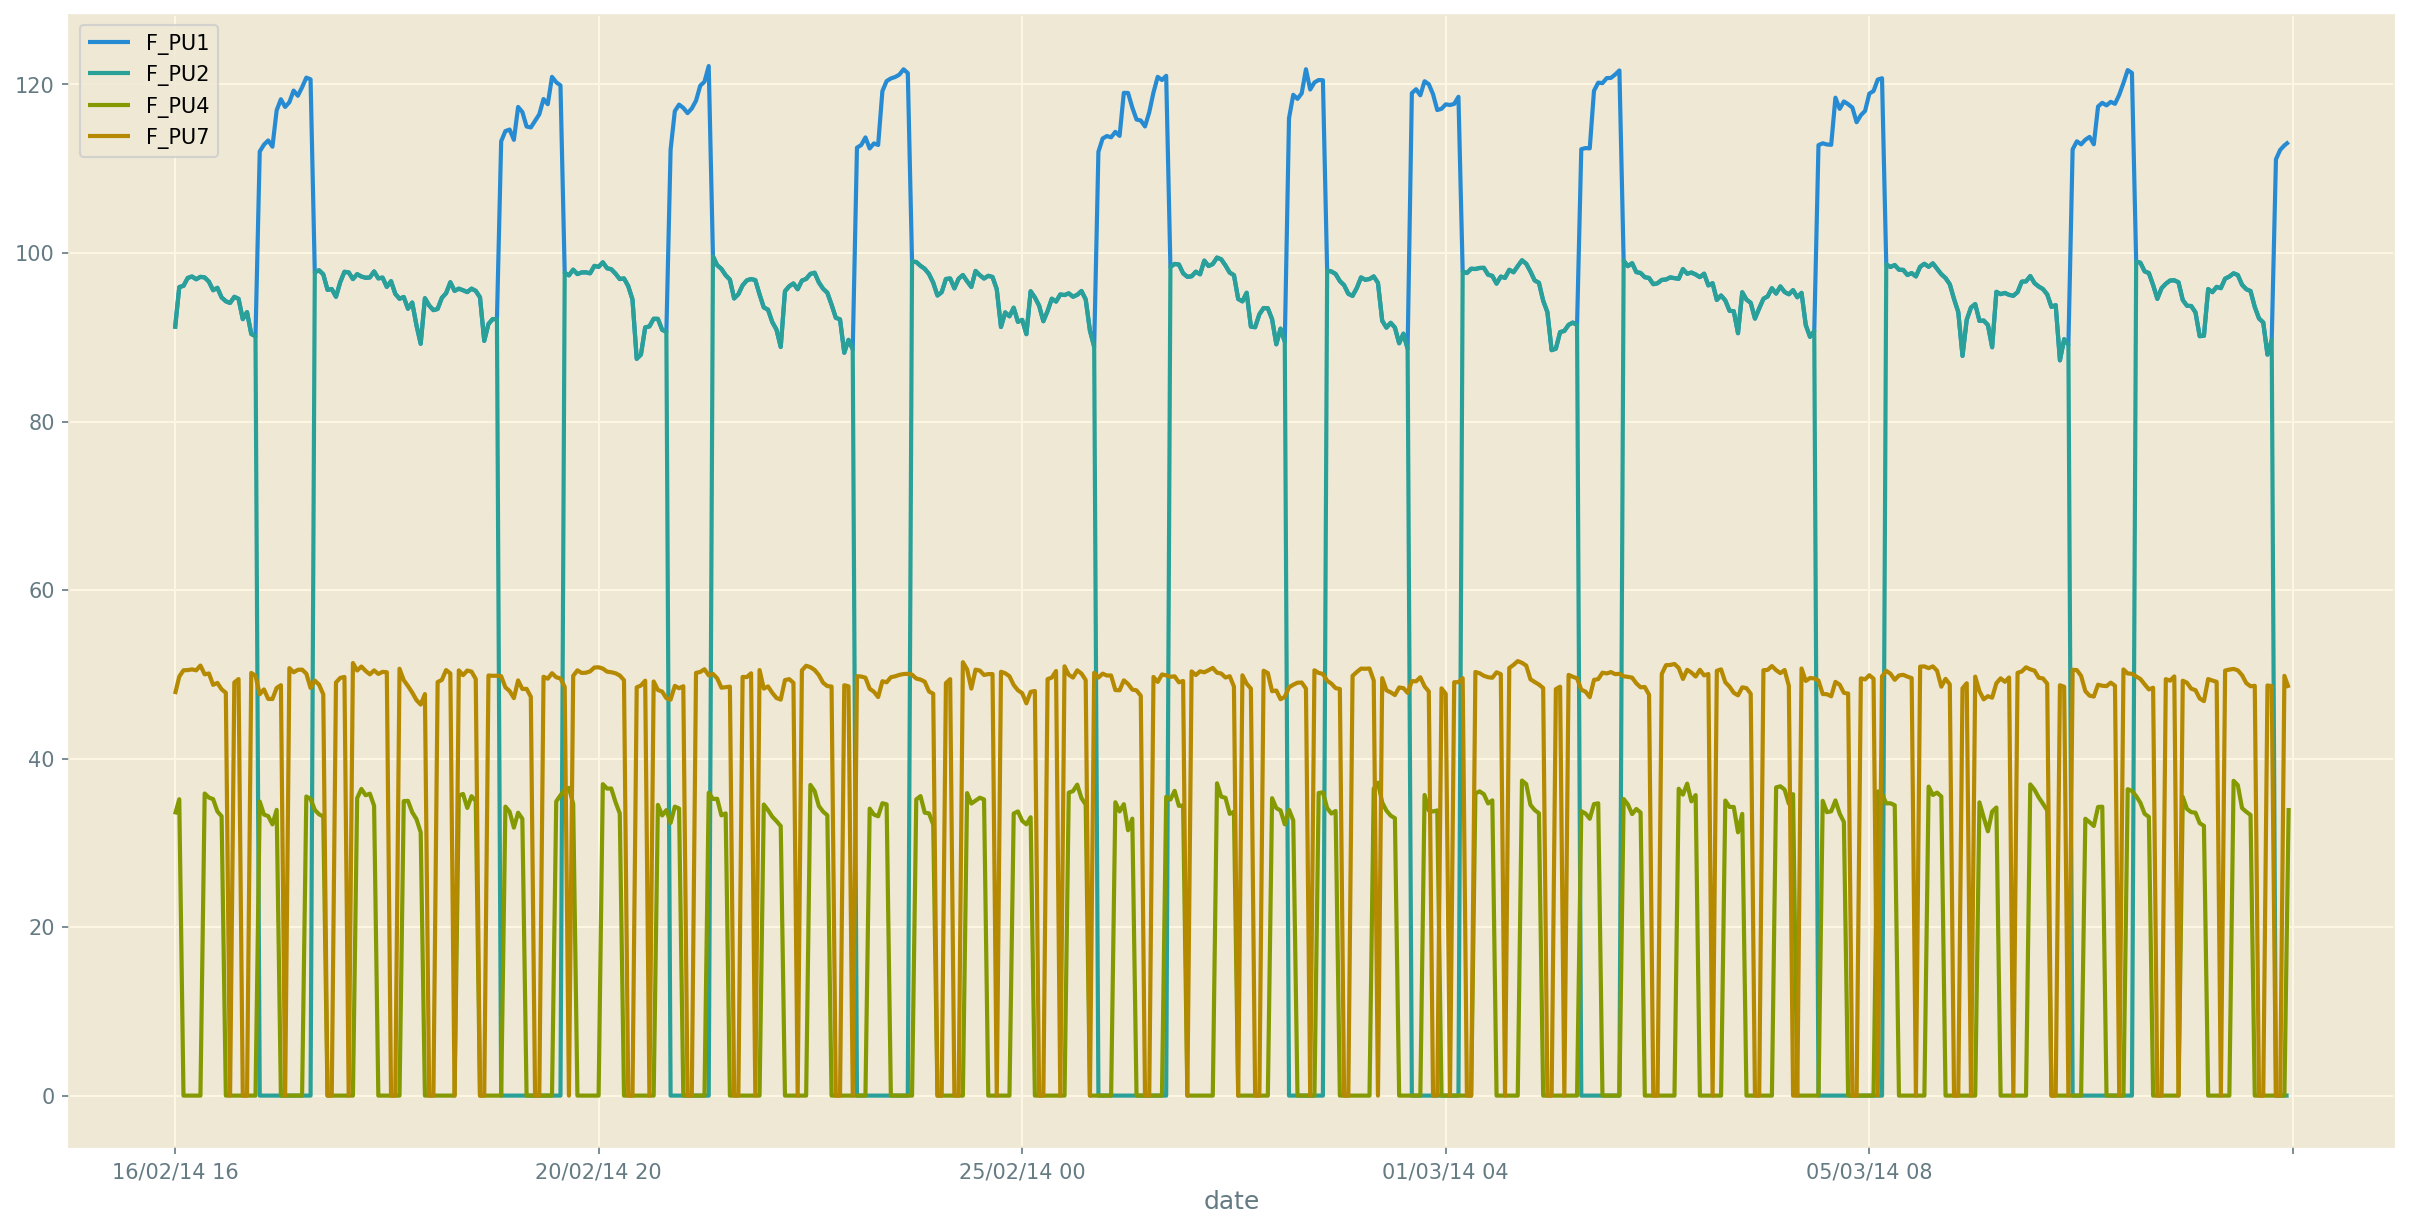

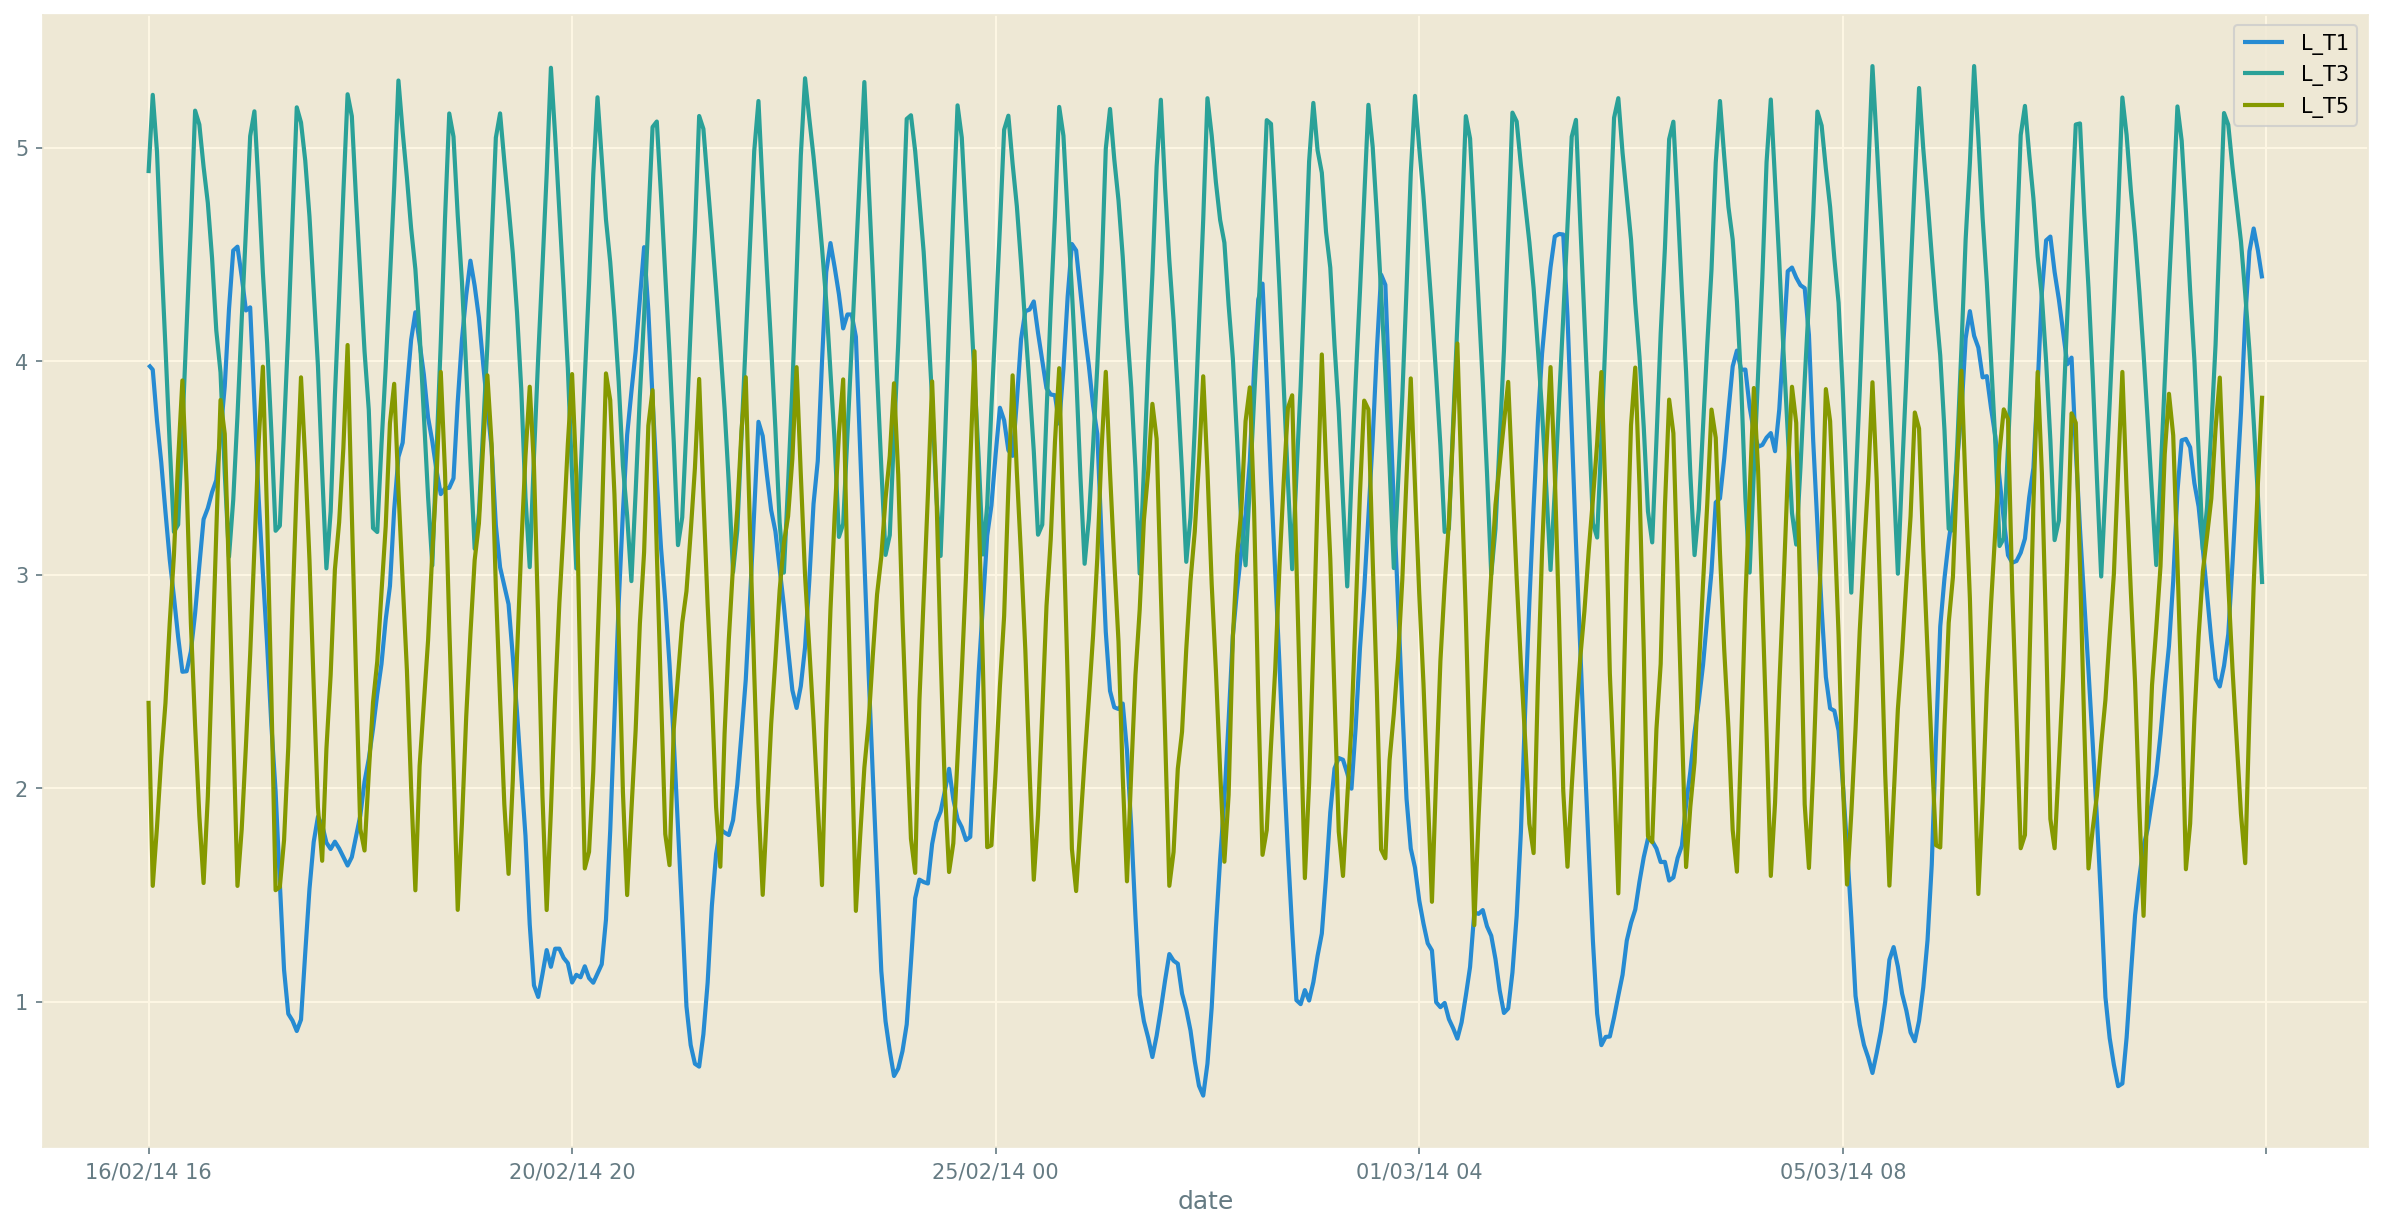

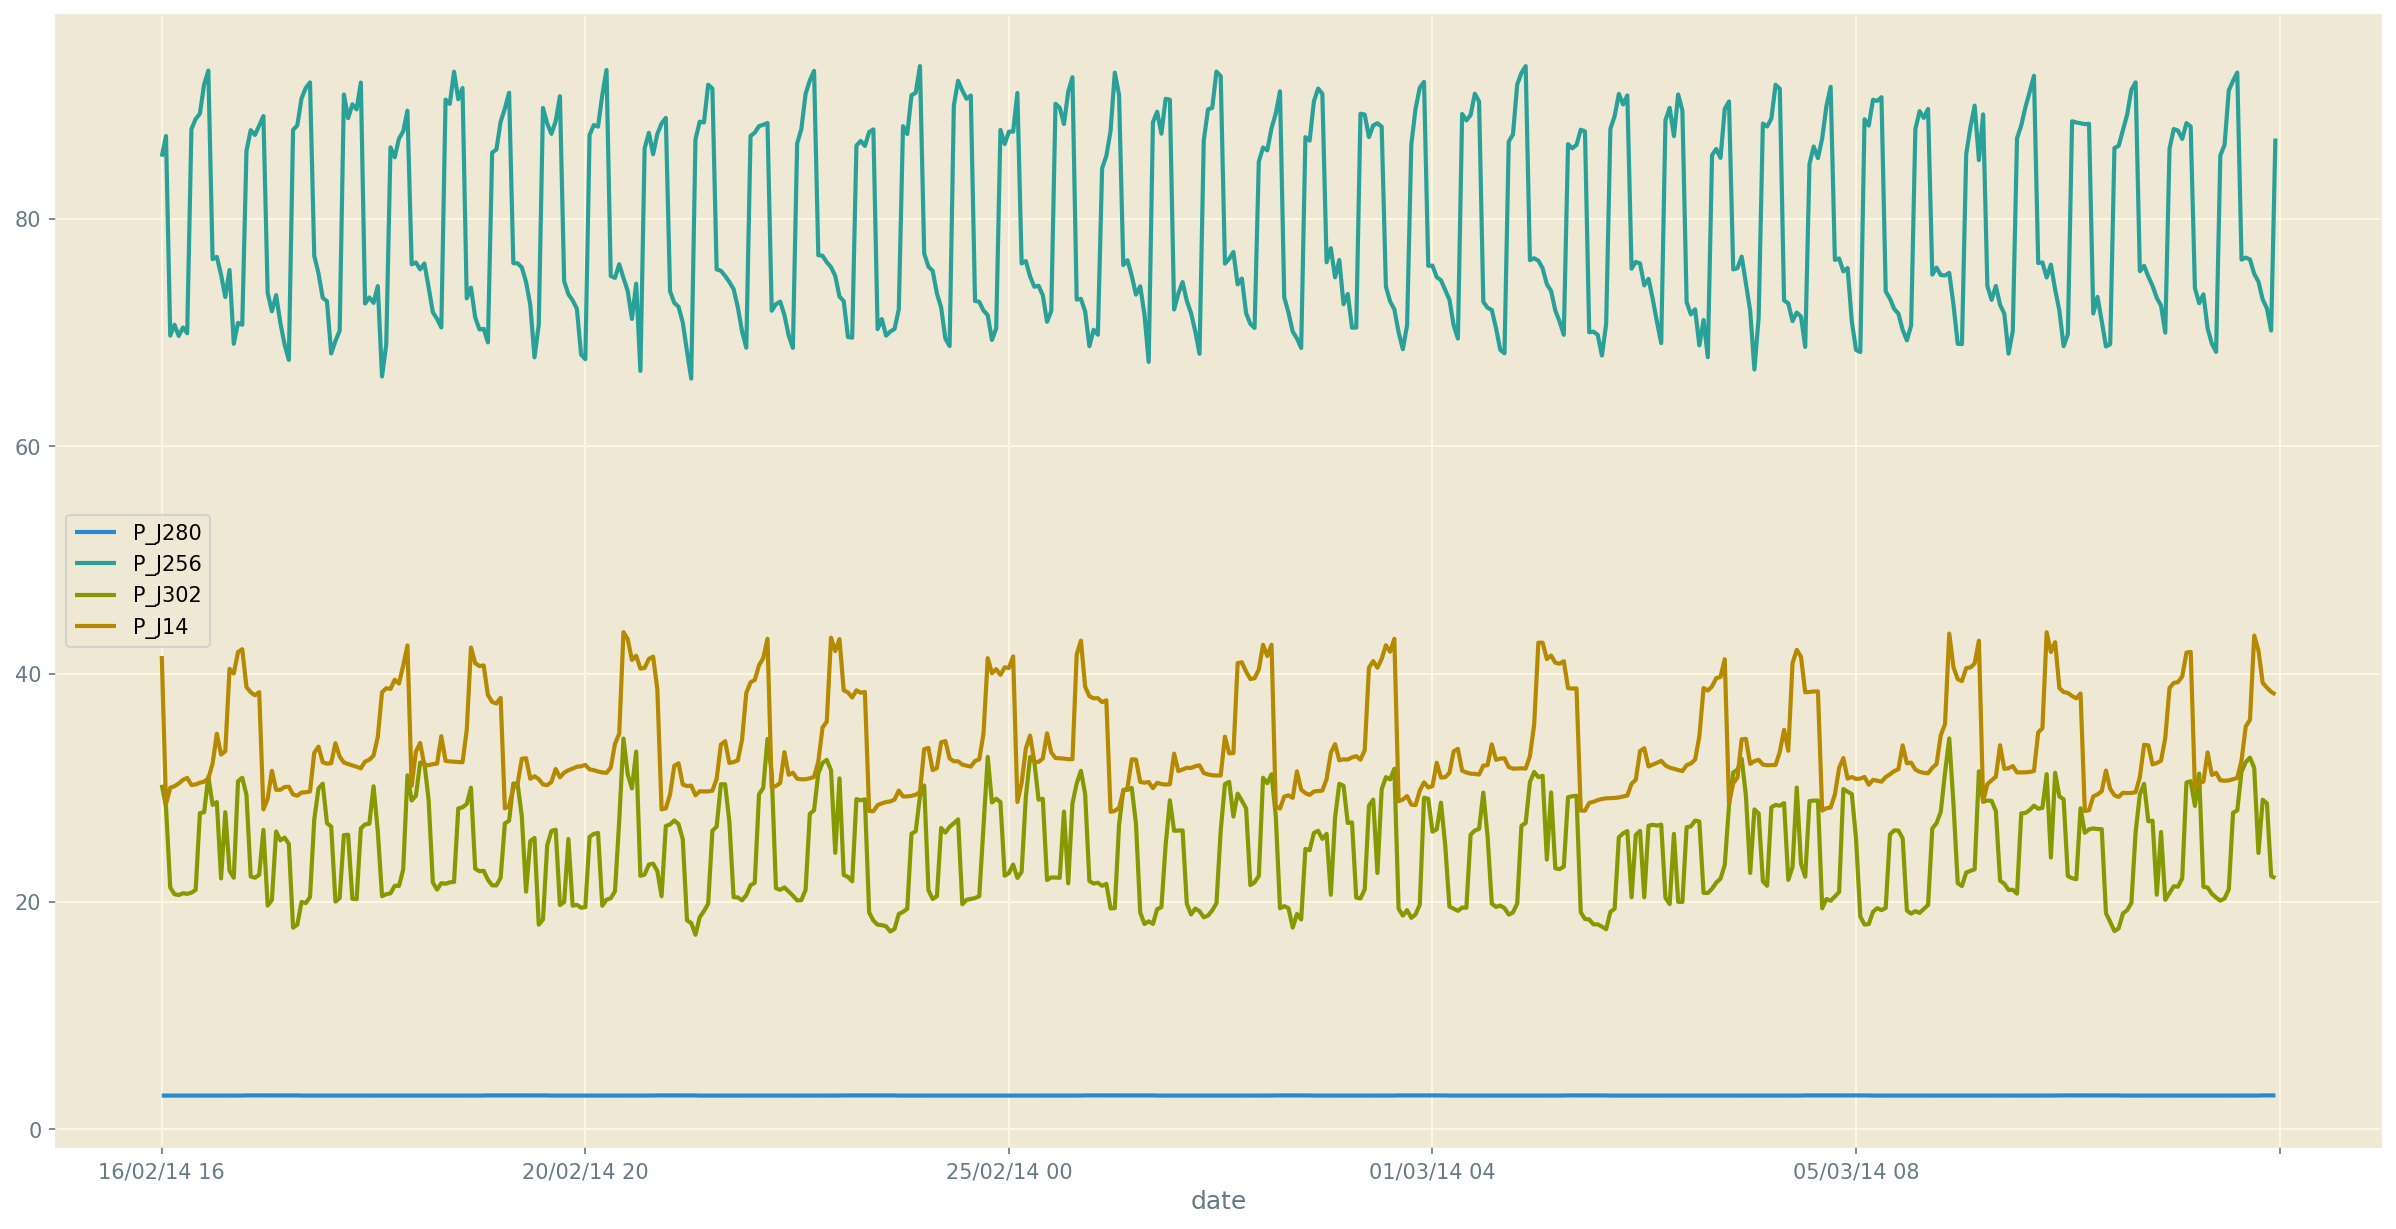

In [61]:
data_preproc_1_2 = pd.DataFrame({
    'date': df["DATETIME"],
    'F_PU1': df["F_PU1"],
    'F_PU2': df["F_PU2"]
})[1000:1500]
data_preproc = pd.DataFrame({
    'date': df["DATETIME"],
    'F_PU1': df["F_PU1"],
    'F_PU2': df["F_PU2"],
    'F_PU4': df["F_PU4"],
    'F_PU7': df["F_PU7"],
})[1000:1500]
data_preproc2 = pd.DataFrame({
    'date': df["DATETIME"],
    'L_T1': df["L_T1"],
    'L_T3': df["L_T3"],
    'L_T5': df["L_T5"],
})[1000:1500]
data_preproc3 = pd.DataFrame({
    'date': df["DATETIME"],
    'P_J280': df["P_J280"],
    'P_J256': df["P_J256"],
    'P_J302': df["P_J302"],
    'P_J14': df["P_J14"],
})[1000:1500]

print('You can see a clear correlation between F_PU1 and F_PU2')
data_preproc_1_2.plot(figsize=(20,10), x='date')
data_preproc.plot(figsize=(20,10), x='date')
data_preproc2.plot(figsize=(20,10), x='date')
data_preproc3.plot(figsize=(20,10), x='date')


3.	Is predicting the next value in a series easy or hard? Use any method from class.

A Moving Average predictor was used to predict the series. A prediction is made by taking the average value of the last few points in the dataset as the prediction of the next value. For a window size of x the first x points are discarded, then point x + 1 is predicted by taking the mean of the x points. Then, point x+2 is predicted by taking the mean of x + 1, x and x - 1 (The actual value point x+1, not the predicted one from before).

Using this we predict the values of 3 randomly selected sensors: $F\_PU1, P\_J14, L\_T1$.
The resulting mean square error for windows sizes 1 upto 4 is given in the following table:

F_PU1 window 1, MSE: 22.52876800505293
F_PU1 window 2, MSE: 28.054642990271294
F_PU1 window 3, MSE: 34.441194194645675
F_PU1 window 4, MSE: 41.02657818596487
P_J14 window 1, MSE: 7.821453635668086
P_J14 window 2, MSE: 9.26305419702651
P_J14 window 3, MSE: 10.744100250175576
P_J14 window 4, MSE: 12.222990868593714
L_T1 window 1, MSE: 0.05540482503213124
L_T1 window 2, MSE: 0.11655654640697702
L_T1 window 3, MSE: 0.1946729437494204
L_T1 window 4, MSE: 0.2860703968441422


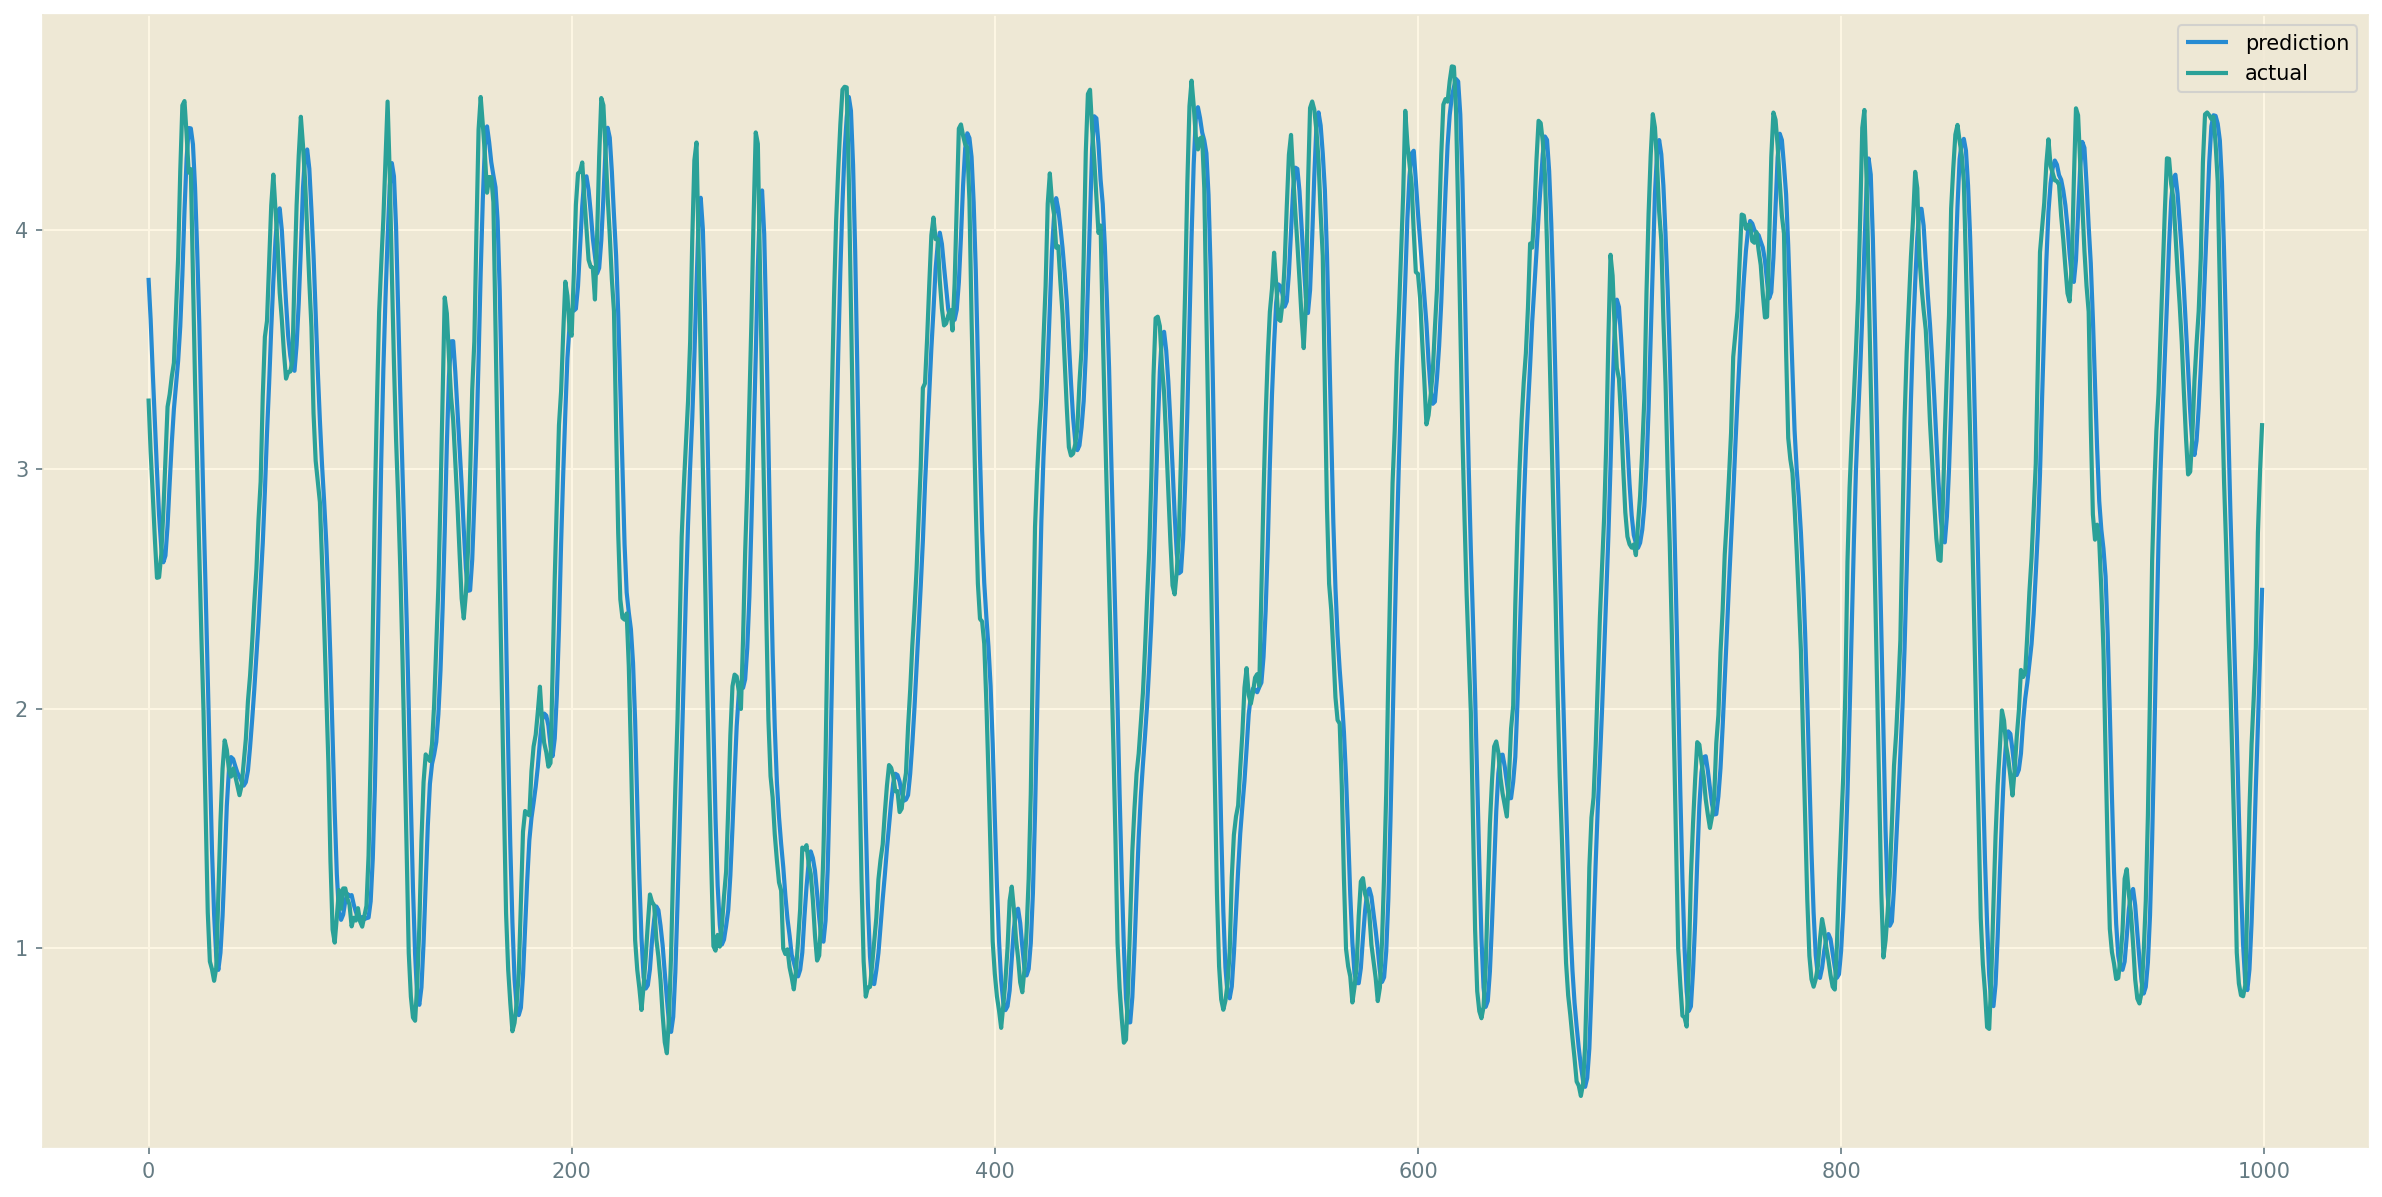

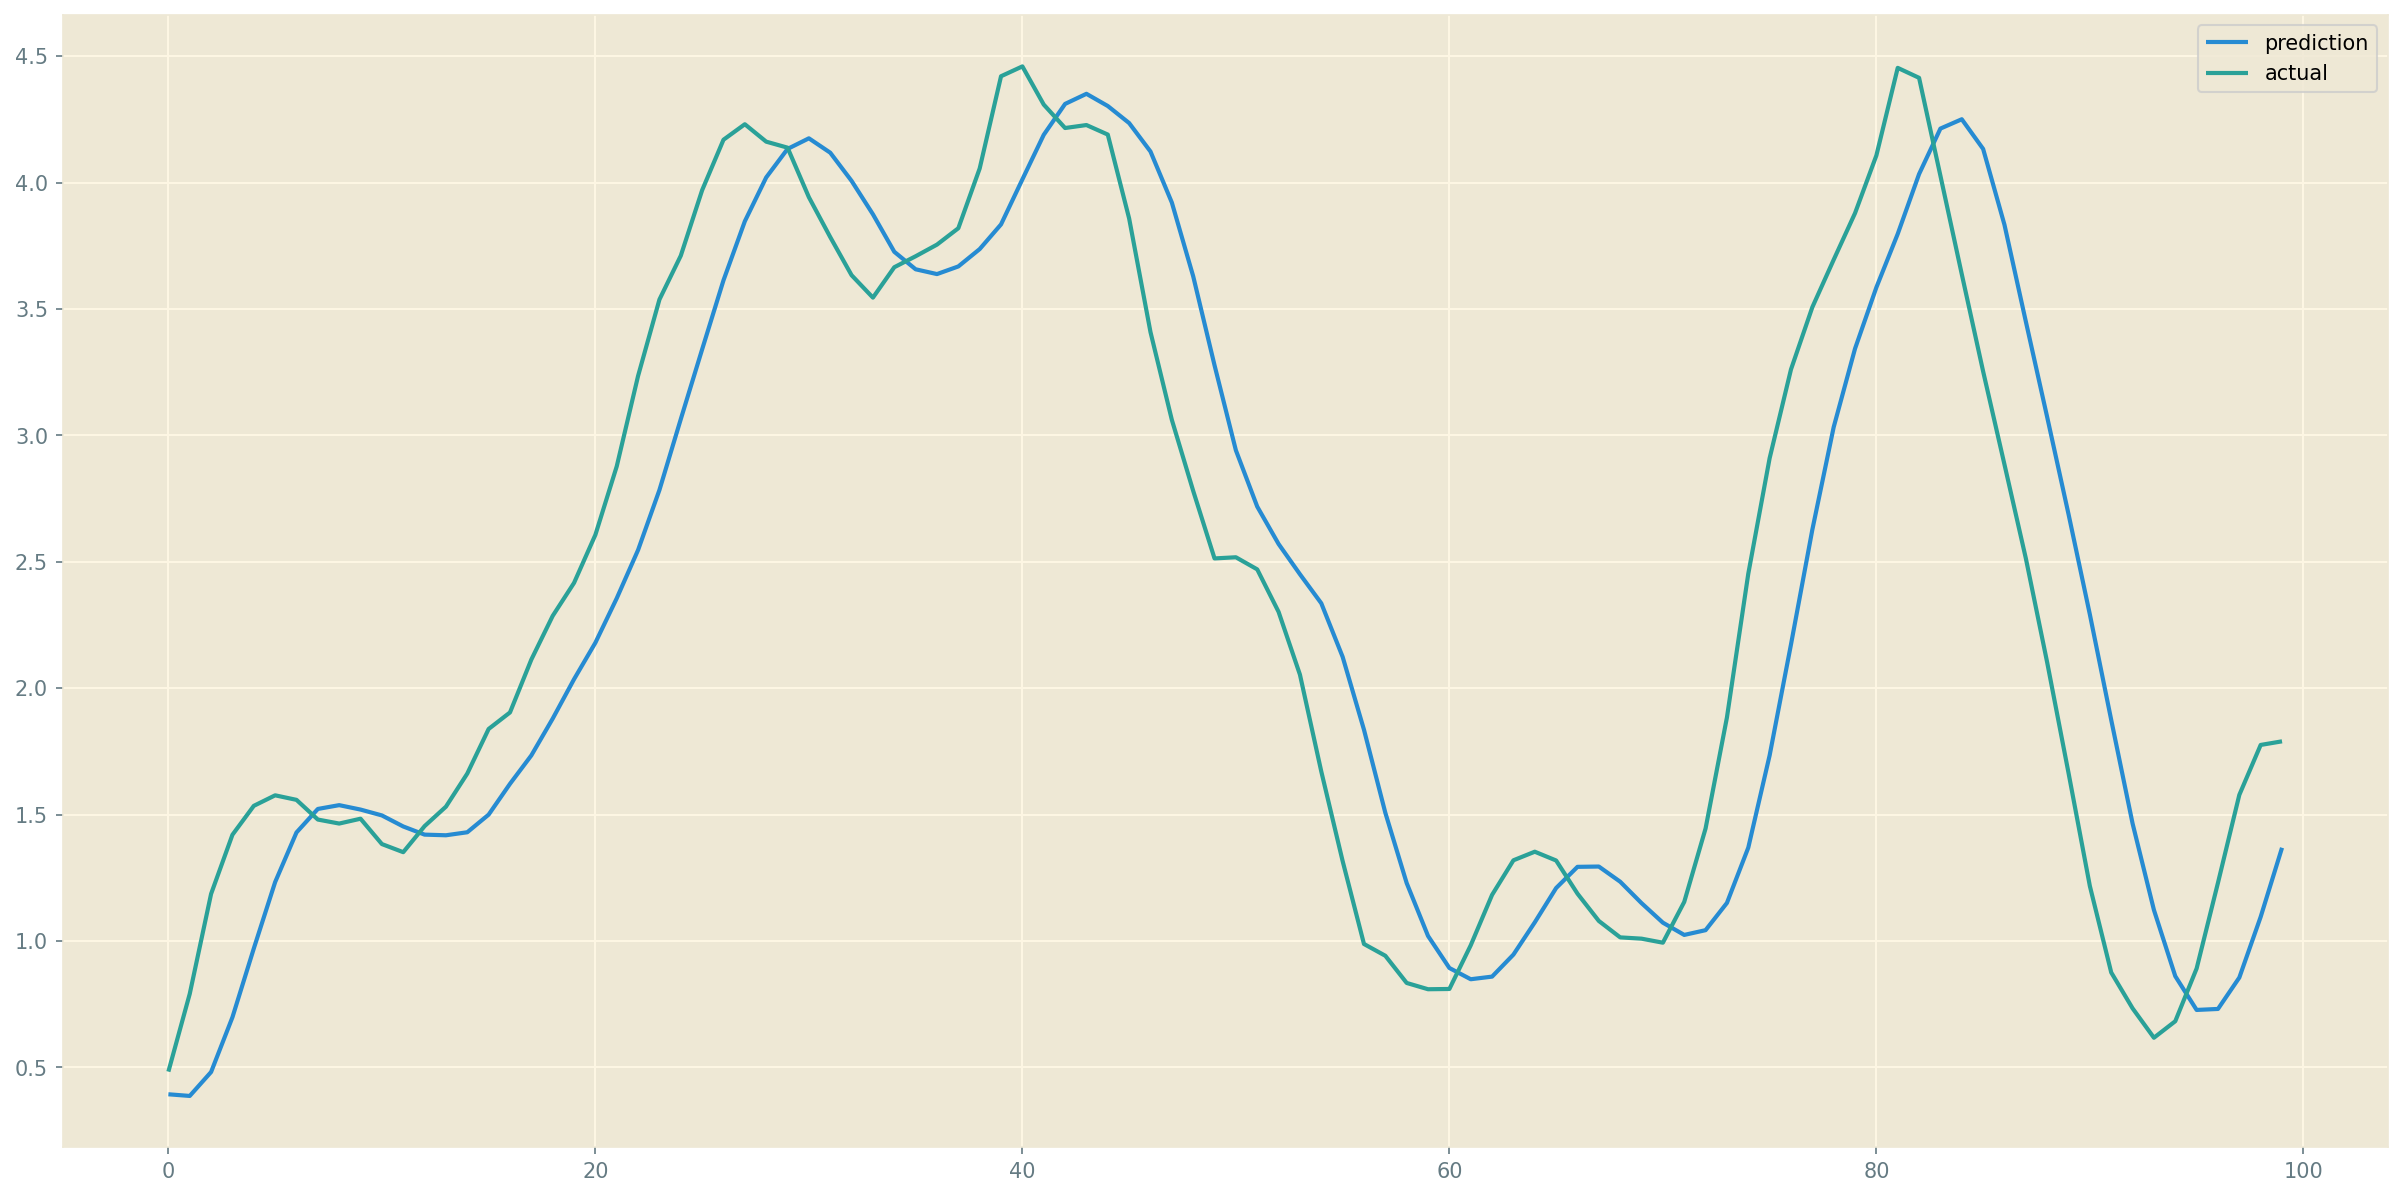

In [71]:
from numpy import mean
from sklearn.metrics import mean_squared_error

def moving_average_prediction(data, window = 3):
    test = [data[i] for i in range(window, len(data))]
    predictions = []
    
    current_prediction = window
    for t in range(len(test)):
        predicted_value = mean([data[i] for i in range(current_prediction-window,current_prediction)])
        predictions.append(predicted_value)
        current_prediction += 1
    # 	print('predicted=%f, expected=%f' % (yhat, obs))
    
    error = mean_squared_error(test, predictions)
#     print('Test MSE: %.3f' % error)
    return test, predictions, error

data, predictions, error = moving_average_prediction(df['F_PU1'].values, 1)
print(f'F_PU1 window 1, MSE: {error}')
data, predictions, error = moving_average_prediction(df['F_PU1'].values, 2)
print(f'F_PU1 window 2, MSE: {error}')
data, predictions, error = moving_average_prediction(df['F_PU1'].values, 3)
print(f'F_PU1 window 3, MSE: {error}')
data, predictions, error = moving_average_prediction(df['F_PU1'].values, 4)
print(f'F_PU1 window 4, MSE: {error}')

data, predictions, error = moving_average_prediction(df['P_J14'].values, 1)
print(f'P_J14 window 1, MSE: {error}')
data, predictions, error = moving_average_prediction(df['P_J14'].values, 2)
print(f'P_J14 window 2, MSE: {error}')
data, predictions, error = moving_average_prediction(df['P_J14'].values, 3)
print(f'P_J14 window 3, MSE: {error}')
data, predictions, error = moving_average_prediction(df['P_J14'].values, 4)
print(f'P_J14 window 4, MSE: {error}')

data, predictions, error = moving_average_prediction(df['L_T1'].values, 1)
print(f'L_T1 window 1, MSE: {error}')
data, predictions, error = moving_average_prediction(df['L_T1'].values, 2)
print(f'L_T1 window 2, MSE: {error}')
data, predictions, error = moving_average_prediction(df['L_T1'].values, 3)
print(f'L_T1 window 3, MSE: {error}')
data, predictions, error = moving_average_prediction(df['L_T1'].values, 4)
print(f'L_T1 window 4, MSE: {error}')

# plots
pd.DataFrame({"prediction":predictions[1000:2000],
            "actual": data[1000:2000]}).plot(figsize=(20,10))
# zoom plot
pd.DataFrame({"prediction":predictions[:100],
            "actual": data[:100]}).plot(figsize=(20,10))


<a id='2'></a>

## 2. LOF task – 1/2 A4 – Individual
Perform LOF - based anomaly detection on the signal multivariate data points (do not take sequential context into account), use a distance of your choice. Plot the LOF scores on the training data 1 as a signal for several numbers of neighbors. Select a number to use and justify this choice using the obtained LOF scores and detected anomalies. Do you see large abnormalities in the training data? Can you explain why these occur? It is best to remove such abnormalities from the training data since you only want to model normal behavior. Describe the kind of anomalies you can de tect using LOF 


<a id='2a'></a>

### 2a. Plot LOF scores


<a id='2b'></a>

### 2b. Analysis and answers to the questions


<a id='3'></a>

## 3. PCA task – 1/2 A4 – Individual
Perform PCA - based anomaly detection on the signal multivariate data points (do not take sequential context into account). Plot the PCA residuals for different number of components on training data 1 in one signal. Choose the number of components based on the residuals and detected anomalies. Do you see large abnormalities in the training data? Can you explain why these occur? It is best to remove such abnormalities from the training data since you only want to model normal behavior. Describe the kind of anomalies you can detect using PCA.


In [ ]:
# Preprocessing
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.decomposition import PCA

df = df.drop('DATETIME', axis=1)

def normalize(df):
    df_normalized = df.copy()
    df_normalized = df_normalized

    normalize = TimeSeriesScalerMeanVariance(mu=0, std=1)
    for col in df:
        df_normalized[col] = normalize.fit_transform(df_normalized[col])[0]

    return df_normalized

df_normalized = normalize(df)

In [ ]:
## Residuals 
pca = PCA()
pca.fit(df_normalized)
df_inverse_transformed = pca.inverse_transform(df_normalized)
pca_residual = df_normalized - df_inverse_transformed
pca_residual = np.square(pca_residual)
pca_residual_combined = pca_residual.sum(axis=1) 

figure, ax = plt.subplots()
plt.xlabel('Data points')
plt.ylabel('Residual')
plt.figure()
ax.plot(pca_residual_combined)
figure.savefig('pcaresidual.png')

In [ ]:
## Drop the abnormalities
indices_to_drop = np.where(pca_residual_combined > 2000)
print(indices_to_drop)
index = indices_to_drop[0]
print('before', df_normalized.shape)
df_cleaned = df_normalized.copy()
for index in indices_to_drop:
    row = df.iloc[index]
    df_cleaned = df_normalized.drop(row.index)
print('after', df_cleaned.shape)

In [ ]:
# Re-normalize
df_cleaned_normalized = normalize(df_cleaned)

In [ ]:
## Find importance of each principal component
pca = PCA()
pca.fit(df_cleaned_normalized)
x_axis = np.arange(1, df_cleaned_normalized.shape[1]+1, 1)
plt.xlabel('Principal Component')
plt.ylabel('Variance Captured')
plt.plot(x_axis, pca.explained_variance_ratio_)

In [ ]:
# Cummulative Variance
cummulative_variance = pca.explained_variance_ratio_.cumsum()
x_axis = np.arange(1, df_cleaned_normalized.shape[1]+1, 1)
plt.xlabel('Principal components')
plt.ylabel('Cummulative variance captured')
plt.plot(x_axis, cummulative_variance)

In [ ]:
# Residual is now low
pca = PCA()
pca.fit(df_cleaned_normalized)
df_inverse_transformed = pca.inverse_transform(df_cleaned_normalized)
pca_residual = df_cleaned_normalized - df_inverse_transformed
pca_residual = np.square(pca_residual)
pca_residual_combined = pca_residual.sum(axis=1) 

figure, ax = plt.subplots()
plt.xlabel('Data points')
plt.ylabel('Residual')
plt.figure()
ax.plot(pca_residual_combined)

In [ ]:
# Prepare the test dataset
test_dataset = normalize(df_attacks.drop('DATETIME', axis=1).drop(' ATT_FLAG', axis=1))

In [ ]:
# Find threshold 
pca = PCA(n_components=15)
# pca.fit(df_cleaned_normalized)
transformed = pca.fit_transform(df_cleaned_normalized)
df_inverse_transformed = pca.inverse_transform(transformed)
pca_residual = df_cleaned_normalized - df_inverse_transformed
pca_residual = np.square(pca_residual)
pca_residual_combined = pca_residual.sum(axis=1) 
threshold_max = np.max(pca_residual_combined)
threshold_min = np.min(pca_residual_combined)

# analyse test set
pca = PCA(n_components=15)
pca.fit(test_dataset)
transformed = pca.fit_transform(test_dataset)
reconstructed = pca.inverse_transform(transformed)

residual_pca = test_dataset - reconstructed
residual_pca = np.square(residual_pca)
residual_pca = residual_pca.sum(axis=1) 

# Find attacks
attack_indices = np.where((residual_pca > threshold_max*2))
attack_indices2 = np.where((residual_pca < threshold_min*0.5))

all_detected_attacks = np.append(attack_indices[0], attack_indices2[0])

TP = 0
FP = 0
for index in all_detected_attacks:
    if index in list(df_attacks.loc[df_attacks[' ATT_FLAG']==1].index):
        TP +=1
    else:
        FP +=1 

print(f'TP={TP}\nFP={FP}')


<a id='3a'></a>

### 3a. Plot PCA residuals

In [ ]:
def plot_attacks(residuals, attacks, detected_anomalies):
    show_from = 0
    show_to = 5000
    detected_attacks = []
    for a in range(len(attacks)):
            if a in detected_anomalies:
                detected_attacks.append(0.5)
            else:
                detected_attacks.append(-99)

    detected_attacks = pd.DataFrame(detected_attacks)
    plt.figure(figsize=[10,5])
    residuals = residuals - np.mean(residuals)
#     plt.plot(residuals[show_from:show_to], label="residuals (normalized)")
    plt.plot(attacks[show_from:show_to], label="Actual attacks")
    plt.plot(detected_attacks[show_from:show_to], label="Detected Attacks")

    axes = plt.gca()
    axes.set_ylim([0,2])
    plt.legend()
    plt.savefig('pca_plot.png')
    plt.show()
    
plot_attacks(residual_pca, df_attacks[' ATT_FLAG'], all_detected_attacks)


<a id='3b'></a>

### 3b. Analysis and answers to the questions


<a id='4'></a>

## 4. ARMA task – 1/2 A4 - Individual
Learn an autoregressive moving average model (see Wikipedia for an introduction if unfamiliar) for each individual sensor. Most statistical packages (statsmodels in Python) contain standard algorithms for fitting these models to training data. Use autocorrelation plots in order to identify the order of the ARMA models. The parameters can be determined using Akaike’s Information Criterion (AIC) or another model selection method. Note that there exists a wide range of ARMA variants; you only have to use the basic model. Plots the residual errors and study some of the detected anomalies. What kind of anomalies can you detect using ARMA models? Which sensors can be modeled effectively using ARMA  

In [8]:
%pip install scipy

# Make sure you have statsmodels >0.9.0 as it fails to import statsmodels.api
# see https://github.com/statsmodels/statsmodels/issues/5759
%pip install git+https://github.com/statsmodels/statsmodels
    
# If the cell below this runs successfully you do NOT need this, especially the line 'import statsmodels.api as sm'

Note: you may need to restart the kernel to use updated packages.


'C:\tools\Anaconda3\envs\Cyber' is not recognized as an internal or external command,
operable program or batch file.


Note: you may need to restart the kernel to use updated packages.


'C:\tools\Anaconda3\envs\Cyber' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
import numpy as np
# from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

mpl.rcParams['figure.dpi'] = 150
rcParams['figure.figsize'] = 6,5


ModuleNotFoundError: No module named 'statsmodels'

## Autocorrelation function
We calculate the autocorrelation and partial autocorrelation functions to make an informed descision about what ARMA parameters to use.

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# from statsmodels.graphics.tsaplots import plot_acf
fig = sm.graphics.tsa.plot_acf(df['F_PU1'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['F_PU1'], lags=40, ax=ax2)

In [ ]:
# "The higher the AR order gets, the lower the AIC gets." you care about the rate of change. When the AIC does not drop substantially with the increase of an AR term, the search can stop for that sensor. 
def test_arma_params(train_series, params):
    # Find optimal parameters based on AIC 
    arma_mod = sm.tsa.ARMA(train_series, (0,0)).fit()
    
    zero_aic = arma_mod.aic
    best_params = params[0]
    lowest_aic = arma_mod.aic
    prev_aic = arma_mod.aic
    
    print(f"first aic is {prev_aic}")
    for param_set in params:
        print("testing " + str(param_set))
        try:
            arma_mod = sm.tsa.ARMA(train_series, param_set).fit()
            print(str(arma_mod.aic))
        except:
            continue
        print(f"Change: {arma_mod.aic - prev_aic}, change vs first: {arma_mod.aic - zero_aic}")
        prev_aic = arma_mod.aic
        if arma_mod.aic < lowest_aic:
            lowest_aic = arma_mod.aic
            best_params = param_set
            
    print('best params: ' + str(best_params))


def do_arma(train_series, test_series, params, attack_flags):
    print(f'####################################\nCurrent Series: {train_series.name}\n####################################')
    train_model = sm.tsa.ARMA(train_series, params).fit()#method='mle', trend='nc')
    test_model = sm.tsa.ARMA(test_series, params).fit(start_params = train_model.params)#, transpars = False, method='mle', trend='nc')

    #The equations are somewhat simpler if the time series is first reduced to zero-mean by subtracting the sample mean. Therefore, we will work with the mean-adjusted series

    # Plotting the residuals
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    resid = test_model.resid
    ax = resid.plot(ax=ax);

    # +
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    fig = qqplot(resid, line='q', ax=ax, fit=True)
    # -

    # ## ARMA Model Autocorrelation
    print("Autocorrelation plots:")
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

    # ## Prediction
#     prediction = test_model.predict()
#     pd.DataFrame({"prediction":prediction[100:400],
#                 "actual": train_series[100:400]}).plot(figsize=(20,10))

    # ## Anomaly detection    
    resid = test_model.resid
    std = np.std(resid)
    anomaly_thresh = 2 * std
    detected_anomalies = test_model.resid[(resid) > anomaly_thresh]
    
    test_model = pd.DataFrame({ 'ATT_FLAG': attack_flags })
    tp=0
    fp=0
    for index, _ in detected_anomalies.items():
        if attack_flags[index]==1:
            tp+=1
        else:
            fp+=1
    tn=test_model.loc[attack_flags==-999].shape[0]-fp
    fn=test_model.loc[attack_flags==1].shape[0]-tp
    acc=100.0*(tp+tn)/(tp+tn+fp+fn)
    if (tp+fp)!=0:
        prec= 100.0 *tp / (tp + fp)
    else:
        prec=0
    print(f"TP: {tp}")
    print(f"FP: {fp}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {prec}")
    return detected_anomalies, resid

In [ ]:
def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def plot_attacks(residuals, attacks, detected_anomalies, show_range = (0,5000)):
    show_from = show_range[0]
    show_to = show_range[1]
    detected_attacks = []
    for a in range(len(df_attacks)):
            if a in detected_anomalies:
                detected_attacks.append(0.7)
            else:
                detected_attacks.append(-999)

    detected_attacks = pd.DataFrame(detected_attacks)
    plt.figure()
    residuals = residuals - np.mean(resid)
    plt.plot(residuals[show_from:show_to], label="residuals")
    plt.plot(attacks[show_from:show_to], label="Attacks")
    plt.plot(detected_attacks[show_from:show_to], label="Detected Attacks")

    axes = plt.gca()
    axes.set_ylim([np.min(residuals)*2,max(np.max(residuals)*1.5, 2)])
    plt.legend()
    plt.savefig("savedplot.png")
    plt.show()


In [ ]:
# L_T4
# param_sets = [(1,0), (2,0), (3,0), (4,0), (5,0), (6,0), (7,0), (8,0)] # best 5,0
# param_sets = [(5,0), (5,1), (5,2), (5,3), (5,4), (5,5), (5,6), (5,7), (5,8)] # best 5,2
# test_arma_params(df['L_T4'], param_sets)

anomalies, resid = do_arma(df['L_T4'], df_attacks[' L_T4'], (0,0), df_attacks[' ATT_FLAG'])
# Zoom in on especially Attack#5 and 6, which attacks F_PU7, affecting L_T4
plot_attacks(resid, df_attacks[' ATT_FLAG'], anomalies, (3000,4000))

# L_T1
# param_sets = [(1,0), (2,0), (3,0), (4,0), (5,0), (6,0), (7,0), (8,0)] # best 4,0
# param_sets = [(4,0), (4,1), (4,2), (4,3), (4, 4), (4,5), (4,6)] # best 4,2
# test_arma_params(df['L_T1'], param_sets)

anomalies, resid = do_arma(df['L_T1'], df_attacks[' L_T1'], (4,2), df_attacks[' ATT_FLAG'])
# zoom in on attacks 3 and 4 specifically
plot_attacks(resid, df_attacks[' ATT_FLAG'], anomalies, (1500,3000))

# L_T7
# param_sets = [(1,0), (2,0), (3,0), (4,0), (5,0), (6,0), (7,0), (8,0)] # best 3,0
# param_sets = [(3,0), (3,1), (3,2), (3,3), (3, 4), (3,5), (3,6)] # best 3,0 or 3,4
# test_arma_params(df['L_T7'], param_sets)

anomalies, resid = do_arma(df['L_T7'], df_attacks[' L_T7'], (3,0), df_attacks[' ATT_FLAG'])
plot_attacks(resid, df_attacks[' ATT_FLAG'], anomalies, (1500,3000))

# P_J300
# param_sets = [(1,0), (2,0), (3,0), (4,0), (5,0), (6,0), (7,0), (8,0)] # best 5,0
# param_sets = [(5,0), (5,1), (5,2), (5,3), (5,4), (5,5), (5,6)] # best 5,6
# test_arma_params(df['P_J300'], param_sets)

anomalies, resid = do_arma(df['P_J300'], df_attacks[' P_J300'], (5,6), df_attacks[' ATT_FLAG'])
plot_attacks(resid, df_attacks[' ATT_FLAG'], anomalies, (1500, 3000))

# F_PU10
# param_sets = [(1,0), (2,0), (3,0), (4,0), (5,0), (6,0), (7,0), (8,0)] # best 2,0
# param_sets = [(2,0), (2,1), (2,2), (2,3), (2,4), (2,5), (2,6)] # best 2,2 or 2,5
# test_arma_params(df['F_PU10'], param_sets)

anomalies, resid = do_arma(df['F_PU10'], df_attacks[' F_PU10'], (2,5), df_attacks[' ATT_FLAG'])
plot_attacks(resid, df_attacks[' ATT_FLAG'], anomalies)


<a id='4a'></a>

### 4a. Print relevant plots and/or metrics to determine the parameters.


<a id='4b'></a>

### 4b. Plots to study the detected anomalies


<a id='4c'></a>

### 4c. Analysis and answers to the questions


<a id='5'></a>

## 5. N-gram task – 1/2 A4 - Individual
Discretize the sensor data using percentiles. Visualize the discretization. Apply N - grams to sliding windows with a length of your choosing in order to find anomalies. Choose a value for N, and a value for a larger sliding window containing the N - grams. Count the occurrence frequencies of the N - grams in each window. Make a table with the different windows as rows and n - grams as columns, in each cell you put the counts for that n - gram in that window. Use a distance measure of your choice (tip: cosine) and detect anomalies using a simple nearest neighbor approach. Plot the What kind of ano malies can you detect? Which sensors can be modeled effectively using N - grams ? 

In [10]:
from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation
from nltk import ngrams
from collections import Counter

def n_grams(n, data):
    gram = []
    for gr in ngrams(data, n):
        gram.append(''.join(gr))
    return gram

ModuleNotFoundError: No module named 'tslearn'

In [ ]:
# Add all the code from Task1 notebook?? (menno's last year) 
# we performed SymbolicAggregateApproximation is this okay??


<a id='5a'></a>

### 5a. Visualise discretization


<a id='5b'></a>

### 5b. Analysis and answers to the questions. Also provide relevant plots.


<a id='6'></a>

## 6.Comparision task 1 A4 - Individual
Compare the performance of the four implemented methods. It is ok if some method’s implementations are less thorough. The goal of this task is to set up a sound comparison and evaluation, not implement new methods. Evaluating anomaly detection methods in not straightforward, and different research studies frequently use dif ferent measures. You can either: 

- test point - wise precision and recall, or 
- overlap - based false and true positives, or /and 
- count a true positive if it detects at least one anomaly in an anomalous region, or 
- compare the top - k detected anomalies,
- or... Describe in a few lines which comparison method you chose for this data and why. 

Keep in mind that in practice an analyst has to take action on every positive detected but will not study every detected data point. Which methods do you advice to use for the BATADAL data ?


<a id='6a'></a>

### 6a. Use the given guidelines and provide a comparision of the above implemented methods.

## 7. Bonus Task 1 A4

### 7a. Provide implementation and analysis.